Objecive
#Build a single layer ANN to predict Sale of ice-cream based on Temperature 

* Parameter used
    Learnig rate: 0.05
    OPtimizer : Adam 
    epochs : 500 
    loss : MSE 
    datarows : 500 
    column : 'Temperature', 'Revenue in $'


In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load dataset 
data = pd.read_csv('https://raw.githubusercontent.com/shivckr/Dataset/master/original.csv')

In [3]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [4]:
def detect_outlier(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn,[25,75])
  IQR = Q3-Q1
  upperrange, lowerrange = [Q3+1.5*IQR, Q1-1.5*IQR]
  return upperrange,lowerrange

  
#find range for Temparture, #find range for revenue 
print(f'outlier Range for temprature {detect_outlier(data.Temperature)}, outlier Range for Revenue {detect_outlier(data.Revenue)}')

outlier Range for temprature (43.6682992275, 1.1946327474999965), outlier Range for Revenue (997.3067823125, 50.509820412500005)


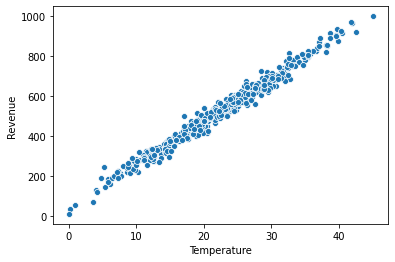

In [5]:
sns.scatterplot(x = data.Temperature, y = data.Revenue)

Above scatter plot says 'Temprature' and 'Revenue' are linearly related and dataset is enriched at diff scale 

In [6]:
#split data into train and test
X_train = data.Temperature
y_train = data.Revenue
print(X_train.shape, y_train.shape)

(500,) (500,)


In [7]:
#define mode1
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [8]:
#model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
# compile/optimize model 
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.05),loss = 'mean_squared_error')
              

In [21]:
#fit the model on training data
epochs_hist = model.fit(X_train, y_train, epochs= 500 )

Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 624.0801
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 624.0660
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 624.0603
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 624.0813
Epoch 5/500
16/16 [==============================] - 0s 981us/step - loss: 624.0321
Epoch 6/500
16/16 [==============================] - 0s 965us/step - loss: 624.1146
Epoch 7/500
16/16 [==============================] - 0s 977us/step - loss: 624.0305
Epoch 8/500
16/16 [==============================] - 0s 1ms/step - loss: 624.0288
Epoch 9/500
16/16 [==============================] - 0s 1ms/step - loss: 624.0203
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 624.0449
Epoch 11/500
16/16 [==============================] - 0s 1ms/step - loss: 624.0365
Epoch 12/500
16/16 [==============================] - 0s 1ms/step - loss: 624.0455
Epoch 1

In [11]:
model.get_weights()

[array([[21.563269]], dtype=float32), array([42.02702], dtype=float32)]

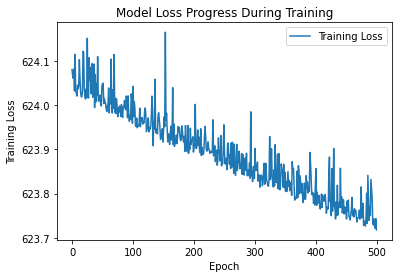

In [22]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [13]:
#make prediction
print(f' Revenue in $ when temperature is  5 degree celsius: {model.predict([5])} ')

 Revenue in $ when temperature is  5 degree celsius: [[149.84337]] 


# Using sklearn make prediction

In [14]:
X1_train = X_train.values.reshape(-1,1)
y1_train = y_train.values.reshape(-1,1)
print(X1_train.shape, y1_train.shape)

(500, 1) (500, 1)


In [15]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept = False)
regressor.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [16]:
print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_)

Linear Model Coeff(m) [[23.22442357]]
Linear Model Coeff(b) 0.0


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

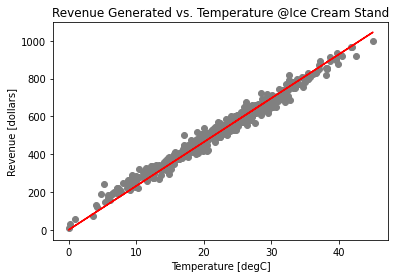

In [17]:
plt.scatter(X1_train, y1_train, color = 'gray')
plt.plot(X1_train, regressor.predict(X1_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')